# Imports

In [41]:
import numpy as np
import pandas as pd
import time
pd.options.mode.chained_assignment = None  # default='warn'


In [2]:
N = 600

t = np.arange(0, N, 1).reshape(-1,1)
t = np.array([t[i] + np.random.rand(1)/4 for i in range(len(t))])
t = np.array([t[i] - np.random.rand(1)/7 for i in range(len(t))])
t = np.array(np.round(t, 2))

x1 = np.round((np.random.random(N) * 5).reshape(-1,1), 2)
x2 = np.round((np.random.random(N) * 5).reshape(-1,1), 2)
x3 = np.round((np.random.random(N) * 5).reshape(-1,1), 2)

n = np.round((np.random.random(N) * 2).reshape(-1,1), 2)

y = np.array([((np.log(np.abs(2 + x1[t])) - x2[t-1]**2) + 0.02*x3[t-3]*np.exp(x1[t-1])) for t in range(len(t))])
y = np.round(y+n, 2)

In [3]:
dataset = pd.DataFrame(np.concatenate((t, x1, x2, x3, y), axis=1), 
                       columns=['t', 'x1', 'x2', 'x3', 'y'])

deltaT = np.array([(dataset.t[i + 1] - dataset.t[i]) for i in range(len(dataset)-1)])
deltaT = np.concatenate((np.array([0]), deltaT))

dataset.insert(1, '∆t', deltaT)
dataset.head(10)

,t,∆t,x1,x2,x3,y
0,0.07,0.00,1.73,4.60,3.99,5.59
1,0.99,0.92,1.07,3.50,3.60,-17.78
2,2.12,1.13,1.43,3.41,1.31,-10.03
3,3.15,1.03,2.74,1.60,4.48,-8.19
4,4.17,1.02,3.15,3.90,3.50,0.50
5,4.91,0.74,2.34,1.03,0.61,-12.54
6,6.09,1.18,1.18,2.13,3.31,2.33
7,7.13,1.04,0.82,0.28,2.31,-3.12
8,8.16,1.03,4.15,3.54,2.20,1.99
9,9.11,0.95,3.77,3.38,2.23,-5.72


In [70]:
trainset = pd.DataFrame(create_a_row)
trainset

,t(0),∆t(0),x1(0),x2(0),x3(0),t(1),∆t(1),x1(1),x2(1),x3(1),t(2),∆t(2),x1(2),x2(2),x3(2),t(3),∆t(3),x1(3),x2(3),x3(3)
0,0.16,0.00,2.20,1.52,0.29,1.10,0.94,3.03,4.77,3.53,2.17,1.07,0.24,2.39,0.02,3.14,0.97,0.75,3.24,4.80
1,1.10,0.94,3.03,4.77,3.53,2.17,1.07,0.24,2.39,0.02,3.14,0.97,0.75,3.24,4.80,4.18,1.04,3.85,4.26,0.78
2,2.17,1.07,0.24,2.39,0.02,3.14,0.97,0.75,3.24,4.80,4.18,1.04,3.85,4.26,0.78,5.05,0.87,0.10,4.76,1.31
3,3.14,0.97,0.75,3.24,4.80,4.18,1.04,3.85,4.26,0.78,5.05,0.87,0.10,4.76,1.31,6.00,0.95,2.64,0.41,3.81
4,4.18,1.04,3.85,4.26,0.78,5.05,0.87,0.10,4.76,1.31,6.00,0.95,2.64,0.41,3.81,7.02,1.02,1.14,1.54,4.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,591.96,1.02,4.35,3.17,0.54,593.16,1.20,4.00,4.08,0.45,594.02,0.86,3.66,3.51,3.27,594.90,0.88,3.88,1.35,0.07
593,593.16,1.20,4.00,4.08,0.45,594.02,0.86,3.66,3.51,3.27,594.90,0.88,3.88,1.35,0.07,596.03,1.13,2.61,2.22,4.03
594,594.02,0.86,3.66,3.51,3.27,594.90,0.88,3.88,1.35,0.07,596.03,1.13,2.61,2.22,4.03,597.13,1.10,0.57,1.65,4.87
595,594.90,0.88,3.88,1.35,0.07,596.03,1.13,2.61,2.22,4.03,597.13,1.10,0.57,1.65,4.87,598.06,0.93,0.52,2.26,0.13


In [132]:
window_size = 4
create_a_row = reshape_to_window(dataset,window_size,include_target=True)
create_a_row

None        t(0)  ∆t(0)  x1(0)  x2(0)  x3(0)   y(0)    t(1)  ∆t(1)  x1(1)  x2(1)  \
0      0.07   0.00   1.73   4.60   3.99   5.59    0.99   0.92   1.07   3.50   
1      0.99   0.92   1.07   3.50   3.60 -17.78    2.12   1.13   1.43   3.41   
2      2.12   1.13   1.43   3.41   1.31 -10.03    3.15   1.03   2.74   1.60   
3      3.15   1.03   2.74   1.60   4.48  -8.19    4.17   1.02   3.15   3.90   
4      4.17   1.02   3.15   3.90   3.50   0.50    4.91   0.74   2.34   1.03   
..      ...    ...    ...    ...    ...    ...     ...    ...    ...    ...   
592  591.93   0.99   2.51   2.28   4.30   0.85  593.06   1.13   4.47   4.88   
593  593.06   1.13   4.47   4.88   0.63  -2.48  594.14   1.08   4.65   3.15   
594  594.14   1.08   4.65   3.15   2.02 -19.69  595.02   0.88   4.63   2.77   
595  595.02   0.88   4.63   2.77   1.60   2.45  596.16   1.14   4.31   2.75   
596  596.16   1.14   4.31   2.75   0.43  -2.58  597.06   0.90   0.75   1.53   

     ...  ∆t(2)  x1(2)  x2(2)  x3(2)   y(2)   

,t(0),∆t(0),x1(0),x2(0),x3(0),y(0),t(1),∆t(1),x1(1),x2(1),...,∆t(2),x1(2),x2(2),x3(2),y(2),t(3),∆t(3),x1(3),x2(3),x3(3)
0,0.07,0.00,1.73,4.60,3.99,5.59,0.99,0.92,1.07,3.50,...,1.13,1.43,3.41,1.31,-10.03,3.15,1.03,2.74,1.60,4.48
1,0.99,0.92,1.07,3.50,3.60,-17.78,2.12,1.13,1.43,3.41,...,1.03,2.74,1.60,4.48,-8.19,4.17,1.02,3.15,3.90,3.50
2,2.12,1.13,1.43,3.41,1.31,-10.03,3.15,1.03,2.74,1.60,...,1.02,3.15,3.90,3.50,0.50,4.91,0.74,2.34,1.03,0.61
3,3.15,1.03,2.74,1.60,4.48,-8.19,4.17,1.02,3.15,3.90,...,0.74,2.34,1.03,0.61,-12.54,6.09,1.18,1.18,2.13,3.31
4,4.17,1.02,3.15,3.90,3.50,0.50,4.91,0.74,2.34,1.03,...,1.18,1.18,2.13,3.31,2.33,7.13,1.04,0.82,0.28,2.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,591.93,0.99,2.51,2.28,4.30,0.85,593.06,1.13,4.47,4.88,...,1.08,4.65,3.15,2.02,-19.69,595.02,0.88,4.63,2.77,1.60
593,593.06,1.13,4.47,4.88,0.63,-2.48,594.14,1.08,4.65,3.15,...,0.88,4.63,2.77,1.60,2.45,596.16,1.14,4.31,2.75,0.43
594,594.14,1.08,4.65,3.15,2.02,-19.69,595.02,0.88,4.63,2.77,...,1.14,4.31,2.75,0.43,-2.58,597.06,0.90,0.75,1.53,2.81
595,595.02,0.88,4.63,2.77,1.60,2.45,596.16,1.14,4.31,2.75,...,0.90,0.75,1.53,2.81,-2.38,598.12,1.06,0.13,0.21,4.99


In [10]:
create_target_value = dataset["y"][window_size-1:].values

In [11]:
trainset["target_y"] = create_target_value

In [12]:
trainset.loc[0:500,:]

,t(0),∆t(0),x1(0),x2(0),x3(0),t(1),∆t(1),x1(1),x2(1),x3(1),...,∆t(2),x1(2),x2(2),x3(2),t(3),∆t(3),x1(3),x2(3),x3(3),target_y
0,0.16,0.00,2.20,1.52,0.29,1.10,0.94,3.03,4.77,3.53,...,1.07,0.24,2.39,0.02,3.14,0.97,0.75,3.24,4.80,-4.31
1,1.10,0.94,3.03,4.77,3.53,2.17,1.07,0.24,2.39,0.02,...,0.97,0.75,3.24,4.80,4.18,1.04,3.85,4.26,0.78,-6.75
2,2.17,1.07,0.24,2.39,0.02,3.14,0.97,0.75,3.24,4.80,...,1.04,3.85,4.26,0.78,5.05,0.87,0.10,4.76,1.31,-16.80
3,3.14,0.97,0.75,3.24,4.80,4.18,1.04,3.85,4.26,0.78,...,0.87,0.10,4.76,1.31,6.00,0.95,2.64,0.41,3.81,-19.77
4,4.18,1.04,3.85,4.26,0.78,5.05,0.87,0.10,4.76,1.31,...,0.95,2.64,0.41,3.81,7.02,1.02,1.14,1.54,4.88,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,496.02,1.04,3.51,0.20,0.80,497.01,0.99,0.11,2.91,1.95,...,1.21,3.15,1.45,2.75,498.93,0.71,1.41,3.03,2.27,-0.14
497,497.01,0.99,0.11,2.91,1.95,498.22,1.21,3.15,1.45,2.75,...,0.71,1.41,3.03,2.27,500.11,1.18,2.80,1.88,4.14,-6.10
498,498.22,1.21,3.15,1.45,2.75,498.93,0.71,1.41,3.03,2.27,...,1.18,2.80,1.88,4.14,501.15,1.04,3.55,3.49,2.76,-0.64
499,498.93,0.71,1.41,3.03,2.27,500.11,1.18,2.80,1.88,4.14,...,1.04,3.55,3.49,2.76,502.08,0.93,1.20,0.54,4.98,-7.79


In [13]:
ml_trainset = trainset.loc[0:500,:]
ml_testset = trainset.loc[501:,:]

In [16]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(ml_trainset.iloc[:,:-1], ml_trainset.iloc[:,-1])

t0 = time.time()
lr_y = ml_testset['target_y'].values
lr_y_fit = lr_model.predict(ml_trainset.iloc[:,:-1])
lr_y_pred = lr_model.predict(ml_testset.iloc[:,:-1])
tF = time.time()

lr_residuals = lr_y_pred - lr_y
lr_rmse = np.sqrt(np.sum(np.power(lr_residuals,2)) / len(lr_residuals))
print('RMSE = %.2f' % lr_rmse)
print('Time to train = %.2f seconds' % (tF - t0))

RMSE = 2.79
Time to train = 0.00 seconds


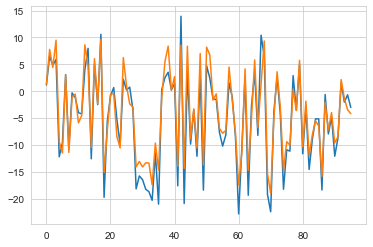

In [19]:
from matplotlib import pyplot as plt
plt.plot([i for i in range(len(lr_y))],lr_y,label = "Actual y")
plt.plot([i for i in range(len(lr_y))],lr_y_pred,label = "Predicted y")
plt.show()

# Helper functions for reshaping

In [44]:
def reshape_to_window(dataset,window_size,target_value = "y", include_target = False,drop_columns = None): #hourly scope
    columns_size = dataset.shape[1]
    create_a_row = []
    columns_to_save_after_proceed = None
    target_values = dataset.iloc[window_size-1:,][target_value].values
    if(drop_columns!=None):
        columns_to_save_after_proceed = dataset.iloc[window_size-1:,][drop_columns]
        columns_to_save_after_proceed = columns_to_save_after_proceed.reset_index(drop = True)
        dataset = dataset.drop(columns = drop_columns,axis = 1)
    for r in range(dataset.shape[0]-window_size+1):
        create_a_row.append({})
        for row in range(window_size):
            for col in dataset.columns:
                if(col==target_value and row == window_size-1):
                    continue
                elif(col == target_value and include_target == False):
                    continue
                else:
                    create_a_row[r][f"{col}({row})"] = dataset[col][dataset[col].index[row+r]]
    
    create_a_row = pd.DataFrame(create_a_row)
    result = create_a_row
    #print(len(target_values))
    result[target_value] = target_values 
    if(drop_columns!=None):
        result = pd.concat([columns_to_save_after_proceed,create_a_row],axis = 1)
    return result

def reshape_whole_table(dataset,window_size,target_value = "y", include_target = False,drop_columns = None):
    hours = list(set(dataset["hour"]))
    xs = list(set(dataset["x"]))
    ys = list(set(dataset["y"]))
    
    result = pd.DataFrame()
    
    for x in xs:
        for y in ys:
            temp = dataset.loc[(( dataset["x"] == x) & (dataset["y"] == y))]
            temp = reshape_to_window(temp,window_size=window_size,include_target=include_target,drop_columns=drop_columns,target_value=target_value)
            result = pd.concat([result,temp])
    return result
    
def fill_with_art_hours(subset, dataset, fill_value = 0,number_of_hours = 3):
    '''
    
    :param subset: subset that contains non-windowed values of output emissions without first number of hours
                    to fill them artificially with some mean value
    :param dataset: whole dataset, where we will take data for missing hours from
    :param number_of_hours: how many hours should be additionally filled
    :return: subset, with appended values
    '''
    result = pd.DataFrame()
    for x in set(subset["x"]):
        for y in set(subset["y"]):
            xy_rows = subset.loc[(( subset["x"] == x) & (subset["y"] == y))]
            #print(xy_rows)
            if(xy_rows.shape[0] == 0):
                continue
            else:
                minhour = min(xy_rows["hour"])
                for ihour in range(minhour-number_of_hours,minhour,1):
                    xyhour_row = dataset.loc[(( dataset["x"] == x) & (dataset["y"] == y) & (dataset["hour"] == ihour))]
                    new_xyhour_row = xyhour_row.loc[:,~xyhour_row.columns.str.contains('_out', case=False)]
                    #print(ihour,x,y)
                    #print(xyhour_row)
                    #Fill the emission output
                    if(new_xyhour_row["building_height"].iat[0]<=1):
                        new_xyhour_row["emission_value_out"] = 0
                    else:
                        new_xyhour_row["emission_value_out"] = fill_value
                        
                    #Fill all neighbours for emission output
                    right = dataset.loc[(( dataset["x"] == x+1) & (dataset["y"] == y))]
                    if(right.shape[0]==0):
                        new_xyhour_row["nbr_out"] = 0
                    elif(right["building_height"].iat[0]<=1):
                        new_xyhour_row["nbr_out"] = 0
                    else:
                        new_xyhour_row["nbr_out"] = fill_value
                    
                    left = dataset.loc[(( dataset["x"] == x-1) & (dataset["y"] == y))]
                    if(left.shape[0]==0):
                        new_xyhour_row["nbl_out"] = 0
                    elif(left["building_height"].iat[0]<=1):
                        new_xyhour_row["nbl_out"] = 0
                    else:
                        new_xyhour_row["nbl_out"] = fill_value
                        
                    up = dataset.loc[(( dataset["x"] == x) & (dataset["y"] == y-1))]
                    if(up.shape[0]==0):
                        new_xyhour_row["nbu_out"] = 0
                    elif(up["building_height"].iat[0]<=1):
                        new_xyhour_row["nbu_out"] = 0
                    else:
                        new_xyhour_row["nbu_out"] = fill_value
                    
                    down = dataset.loc[(( dataset["x"] == x) & (dataset["y"] == y+1))]
                    if(down.shape[0]==0):
                        new_xyhour_row["nbd_out"] = 0
                    elif(down["building_height"].iat[0]<=1):
                        new_xyhour_row["nbd_out"] = 0
                    else:
                        new_xyhour_row["nbd_out"] = fill_value
                    xy_rows = pd.concat([xy_rows,new_xyhour_row])
                result = pd.concat([result,xy_rows])
               
    return result

def chained_predict(model,testset):
    pass

In [89]:
day_trainset.loc[(( day_trainset["x"] == 145) & (day_trainset["y"] == 245)) & (day_trainset["hour"]==29)]

,x,y,hour,emission_value,nbr,nbl,nbu,nbd,building_height,wind,nbr_out,nbl_out,nbu_out,nbd_out,emission_value_out
326189,145,245,29,0.0,0.000477,0.000219,0.000421,0.0,24.351851,2.457334,0.029976,0.030154,0.030133,0.0,0.030031


# My dataframes

In [3]:
spec1_in = pd.read_csv("../data/result1_species_in.csv",sep = ";")
res_cols = spec1_in.columns[0:3].values.tolist()+spec1_in.columns[4:].values.tolist()+[spec1_in.columns[3]]
spec1_in = spec1_in[res_cols]
spec1_in["wind"] = 2.4573338 # simulate wind
spec1_in

,x,y,hour,emission_value,nbr,nbl,nbu,nbd,building_height,wind
0,100,200,0,0.0,0.0,0.0,0.0,0.0,0.0,2.457334
1,100,200,1,0.0,0.0,0.0,0.0,0.0,0.0,2.457334
2,100,200,2,0.0,0.0,0.0,0.0,0.0,0.0,2.457334
3,100,200,3,0.0,0.0,0.0,0.0,0.0,0.0,2.457334
4,100,200,4,0.0,0.0,0.0,0.0,0.0,0.0,2.457334
...,...,...,...,...,...,...,...,...,...,...
1079995,249,349,43,0.0,0.0,0.0,0.0,0.0,0.0,2.457334
1079996,249,349,44,0.0,0.0,0.0,0.0,0.0,0.0,2.457334
1079997,249,349,45,0.0,0.0,0.0,0.0,0.0,0.0,2.457334
1079998,249,349,46,0.0,0.0,0.0,0.0,0.0,0.0,2.457334


In [4]:
spec1_out = pd.read_csv("../data/result1_species_out.csv",sep = ";")
spec1_out.columns = spec1_out.columns+"_out" #renaming columns
res_cols = spec1_out.columns[0:3].values.tolist()+spec1_out.columns[4:].values.tolist()+[spec1_out.columns[3]]
spec1_out = spec1_out[res_cols]
spec1_out

,x_out,y_out,hour_out,nbr_out,nbl_out,nbu_out,nbd_out,emission_value_out
0,100,200,0,0.010604,0.000000,0.000000,0.010540,0.010562
1,100,200,1,0.009498,0.000000,0.000000,0.009446,0.009452
2,100,200,2,0.009675,0.000000,0.000000,0.009610,0.009615
3,100,200,3,0.015073,0.000000,0.000000,0.014857,0.014870
4,100,200,4,0.013605,0.000000,0.000000,0.013702,0.013692
...,...,...,...,...,...,...,...,...
1079995,249,349,43,0.000000,0.011800,0.011717,0.000000,0.011732
1079996,249,349,44,0.000000,0.014070,0.013944,0.000000,0.013980
1079997,249,349,45,0.000000,0.017873,0.017751,0.000000,0.017794
1079998,249,349,46,0.000000,0.018957,0.018886,0.000000,0.018918


### Join in and out table and prepare regression

In [5]:
spec1_trainset = pd.concat((spec1_in,spec1_out[spec1_out.columns[3:]]),axis=1)
spec1_trainset

,x,y,hour,emission_value,nbr,nbl,nbu,nbd,building_height,wind,nbr_out,nbl_out,nbu_out,nbd_out,emission_value_out
0,100,200,0,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.010604,0.000000,0.000000,0.010540,0.010562
1,100,200,1,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.009498,0.000000,0.000000,0.009446,0.009452
2,100,200,2,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.009675,0.000000,0.000000,0.009610,0.009615
3,100,200,3,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.015073,0.000000,0.000000,0.014857,0.014870
4,100,200,4,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.013605,0.000000,0.000000,0.013702,0.013692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079995,249,349,43,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.000000,0.011800,0.011717,0.000000,0.011732
1079996,249,349,44,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.000000,0.014070,0.013944,0.000000,0.013980
1079997,249,349,45,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.000000,0.017873,0.017751,0.000000,0.017794
1079998,249,349,46,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.000000,0.018957,0.018886,0.000000,0.018918


In [6]:
test2525 = spec1_trainset.loc[(( spec1_trainset["x"] <= 150) & (spec1_trainset["y"] <= 250))]
test2525

,x,y,hour,emission_value,nbr,nbl,nbu,nbd,building_height,wind,nbr_out,nbl_out,nbu_out,nbd_out,emission_value_out
0,100,200,0,0.0,0.0,0.0,0.0,0.0,0.00000,2.457334,0.010604,0.0,0.0,0.010540,0.010562
1,100,200,1,0.0,0.0,0.0,0.0,0.0,0.00000,2.457334,0.009498,0.0,0.0,0.009446,0.009452
2,100,200,2,0.0,0.0,0.0,0.0,0.0,0.00000,2.457334,0.009675,0.0,0.0,0.009610,0.009615
3,100,200,3,0.0,0.0,0.0,0.0,0.0,0.00000,2.457334,0.015073,0.0,0.0,0.014857,0.014870
4,100,200,4,0.0,0.0,0.0,0.0,0.0,0.00000,2.457334,0.013605,0.0,0.0,0.013702,0.013692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362443,150,250,43,0.0,0.0,0.0,0.0,0.0,24.73604,2.457334,0.000000,0.0,0.0,0.000000,0.000000
362444,150,250,44,0.0,0.0,0.0,0.0,0.0,24.73604,2.457334,0.000000,0.0,0.0,0.000000,0.000000
362445,150,250,45,0.0,0.0,0.0,0.0,0.0,24.73604,2.457334,0.000000,0.0,0.0,0.000000,0.000000
362446,150,250,46,0.0,0.0,0.0,0.0,0.0,24.73604,2.457334,0.000000,0.0,0.0,0.000000,0.000000


In [7]:
window_size = 4
ml_spec1_trainset = reshape_whole_table(test2525,window_size,target_value="emission_value_out",drop_columns=["x","y","building_height"],include_target=False)
ml_spec1_trainset

,x,y,building_height,hour(0),emission_value(0),nbr(0),nbl(0),nbu(0),nbd(0),wind(0),...,nbr(3),nbl(3),nbu(3),nbd(3),wind(3),nbr_out(3),nbl_out(3),nbu_out(3),nbd_out(3),emission_value_out
0,128,200,0.0,0,0.0,0.000000,0.0,0.0,0.0,2.457334,...,0.000000,0.0,0.0,0.0,2.457334,0.013523,0.013653,0.0,0.013631,0.013577
1,128,200,0.0,1,0.0,0.000000,0.0,0.0,0.0,2.457334,...,0.000000,0.0,0.0,0.0,2.457334,0.012360,0.012397,0.0,0.012427,0.012383
2,128,200,0.0,2,0.0,0.000000,0.0,0.0,0.0,2.457334,...,0.000000,0.0,0.0,0.0,2.457334,0.010016,0.010016,0.0,0.010042,0.010018
3,128,200,0.0,3,0.0,0.000000,0.0,0.0,0.0,2.457334,...,0.000000,0.0,0.0,0.0,2.457334,0.010123,0.010200,0.0,0.010206,0.010161
4,128,200,0.0,4,0.0,0.000000,0.0,0.0,0.0,2.457334,...,0.000000,0.0,0.0,0.0,2.457334,0.010164,0.010212,0.0,0.010182,0.010187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,127,250,0.0,40,0.0,0.000415,0.0,0.0,0.0,2.457334,...,0.000177,0.0,0.0,0.0,2.457334,0.000000,0.000000,0.0,0.000000,0.000000
41,127,250,0.0,41,0.0,0.000266,0.0,0.0,0.0,2.457334,...,0.000089,0.0,0.0,0.0,2.457334,0.000000,0.000000,0.0,0.000000,0.000000
42,127,250,0.0,42,0.0,0.000354,0.0,0.0,0.0,2.457334,...,0.000177,0.0,0.0,0.0,2.457334,0.000000,0.000000,0.0,0.000000,0.000000
43,127,250,0.0,43,0.0,0.000177,0.0,0.0,0.0,2.457334,...,0.000000,0.0,0.0,0.0,2.457334,0.000000,0.000000,0.0,0.000000,0.000000


But out emiission of values of neighnbours in (3) contain additional information of emission value in certain cell, that we doesn't have, so we need to filter them out 

In [8]:

ml_spec1_trainset = ml_spec1_trainset.drop(columns=["nbr_out(3)","nbl_out(3)","nbu_out(3)","nbd_out(3)"],axis=1)
ml_spec1_trainset

,x,y,building_height,hour(0),emission_value(0),nbr(0),nbl(0),nbu(0),nbd(0),wind(0),...,nbu_out(2),nbd_out(2),hour(3),emission_value(3),nbr(3),nbl(3),nbu(3),nbd(3),wind(3),emission_value_out
0,128,200,0.0,0,0.0,0.000000,0.0,0.0,0.0,2.457334,...,0.0,0.009473,3,0.0,0.000000,0.0,0.0,0.0,2.457334,0.013577
1,128,200,0.0,1,0.0,0.000000,0.0,0.0,0.0,2.457334,...,0.0,0.013631,4,0.0,0.000000,0.0,0.0,0.0,2.457334,0.012383
2,128,200,0.0,2,0.0,0.000000,0.0,0.0,0.0,2.457334,...,0.0,0.012427,5,0.0,0.000000,0.0,0.0,0.0,2.457334,0.010018
3,128,200,0.0,3,0.0,0.000000,0.0,0.0,0.0,2.457334,...,0.0,0.010042,6,0.0,0.000000,0.0,0.0,0.0,2.457334,0.010161
4,128,200,0.0,4,0.0,0.000000,0.0,0.0,0.0,2.457334,...,0.0,0.010206,7,0.0,0.000000,0.0,0.0,0.0,2.457334,0.010187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,127,250,0.0,40,0.0,0.000415,0.0,0.0,0.0,2.457334,...,0.0,0.000000,43,0.0,0.000177,0.0,0.0,0.0,2.457334,0.000000
41,127,250,0.0,41,0.0,0.000266,0.0,0.0,0.0,2.457334,...,0.0,0.000000,44,0.0,0.000089,0.0,0.0,0.0,2.457334,0.000000
42,127,250,0.0,42,0.0,0.000354,0.0,0.0,0.0,2.457334,...,0.0,0.000000,45,0.0,0.000177,0.0,0.0,0.0,2.457334,0.000000
43,127,250,0.0,43,0.0,0.000177,0.0,0.0,0.0,2.457334,...,0.0,0.000000,46,0.0,0.000000,0.0,0.0,0.0,2.457334,0.000000


In [222]:
division_row = 20
trainset = ml_spec1_trainset.loc[:division_row,]
testset = ml_spec1_trainset.loc[division_row+1:,]
trainset

,x,y,hour(0),nbr(0),nbl(0),nbu(0),nbd(0),emission_value(0),wind(0),nbr_out(0),...,nbu_out(2),nbd_out(2),hour(3),nbr(3),nbl(3),nbu(3),nbd(3),emission_value(3),wind(3),emission_value_out
0,25,25,0,0.0,0.0,0.0,0.0,0.0,2.457334,0.000140,...,0.000049,0.000050,3,0.0,0.0,0.0,0.0,0.0,2.457334,0.000644
1,25,25,1,0.0,0.0,0.0,0.0,0.0,2.457334,0.000027,...,0.000632,0.000633,4,0.0,0.0,0.0,0.0,0.0,2.457334,0.004846
2,25,25,2,0.0,0.0,0.0,0.0,0.0,2.457334,0.000041,...,0.004818,0.004812,5,0.0,0.0,0.0,0.0,0.0,2.457334,0.006625
3,25,25,3,0.0,0.0,0.0,0.0,0.0,2.457334,0.000605,...,0.006610,0.006596,6,0.0,0.0,0.0,0.0,0.0,2.457334,0.007019
4,25,25,4,0.0,0.0,0.0,0.0,0.0,2.457334,0.004757,...,0.007017,0.007005,7,0.0,0.0,0.0,0.0,0.0,2.457334,0.006380
5,25,25,5,0.0,0.0,0.0,0.0,0.0,2.457334,0.006564,...,0.006378,0.006370,8,0.0,0.0,0.0,0.0,0.0,2.457334,0.005780
6,25,25,6,0.0,0.0,0.0,0.0,0.0,2.457334,0.007001,...,0.005778,0.005767,9,0.0,0.0,0.0,0.0,0.0,2.457334,0.005549
7,25,25,7,0.0,0.0,0.0,0.0,0.0,2.457334,0.006363,...,0.005546,0.005534,10,0.0,0.0,0.0,0.0,0.0,2.457334,0.005054
8,25,25,8,0.0,0.0,0.0,0.0,0.0,2.457334,0.005771,...,0.005055,0.005036,11,0.0,0.0,0.0,0.0,0.0,2.457334,0.005218
9,25,25,9,0.0,0.0,0.0,0.0,0.0,2.457334,0.005528,...,0.005215,0.005202,12,0.0,0.0,0.0,0.0,0.0,2.457334,0.005470


In [10]:
trainset = ml_spec1_trainset
testset = trainset
trainset
trainset

,x,y,building_height,hour(0),emission_value(0),nbr(0),nbl(0),nbu(0),nbd(0),wind(0),...,nbu_out(2),nbd_out(2),hour(3),emission_value(3),nbr(3),nbl(3),nbu(3),nbd(3),wind(3),emission_value_out
0,128,200,0.0,0,0.0,0.000000,0.0,0.0,0.0,2.457334,...,0.0,0.009473,3,0.0,0.000000,0.0,0.0,0.0,2.457334,0.013577
1,128,200,0.0,1,0.0,0.000000,0.0,0.0,0.0,2.457334,...,0.0,0.013631,4,0.0,0.000000,0.0,0.0,0.0,2.457334,0.012383
2,128,200,0.0,2,0.0,0.000000,0.0,0.0,0.0,2.457334,...,0.0,0.012427,5,0.0,0.000000,0.0,0.0,0.0,2.457334,0.010018
3,128,200,0.0,3,0.0,0.000000,0.0,0.0,0.0,2.457334,...,0.0,0.010042,6,0.0,0.000000,0.0,0.0,0.0,2.457334,0.010161
4,128,200,0.0,4,0.0,0.000000,0.0,0.0,0.0,2.457334,...,0.0,0.010206,7,0.0,0.000000,0.0,0.0,0.0,2.457334,0.010187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,127,250,0.0,40,0.0,0.000415,0.0,0.0,0.0,2.457334,...,0.0,0.000000,43,0.0,0.000177,0.0,0.0,0.0,2.457334,0.000000
41,127,250,0.0,41,0.0,0.000266,0.0,0.0,0.0,2.457334,...,0.0,0.000000,44,0.0,0.000089,0.0,0.0,0.0,2.457334,0.000000
42,127,250,0.0,42,0.0,0.000354,0.0,0.0,0.0,2.457334,...,0.0,0.000000,45,0.0,0.000177,0.0,0.0,0.0,2.457334,0.000000
43,127,250,0.0,43,0.0,0.000177,0.0,0.0,0.0,2.457334,...,0.0,0.000000,46,0.0,0.000000,0.0,0.0,0.0,2.457334,0.000000


## Linear Regression

### Train on train grid(can be a cell)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
lr_model = LinearRegression()
lr_model.fit(trainset.loc[:,~trainset.columns.str.contains('out', case=False)] , trainset["emission_value_out"])

t0 = time.time()
lr_y = testset['emission_value_out'].values
lr_y_fit = lr_model.predict(trainset.loc[:,~trainset.columns.str.contains('out', case=False)])
lr_y_pred = lr_model.predict(testset.loc[:,~testset.columns.str.contains('out', case=False)])
tF = time.time()

lr_residuals = lr_y_pred - lr_y
lr_rmse = np.sqrt(np.sum(np.power(lr_residuals,2)) / len(lr_residuals))
print('RMSE = %.10f' % lr_rmse)
print('MAE = %.10f' % mean_absolute_error(lr_y,lr_y_pred))
print('Time to train = %.2f seconds' % (tF - t0))

RMSE = 0.0103255123
MAE = 0.0081178177
Time to train = 0.05 seconds


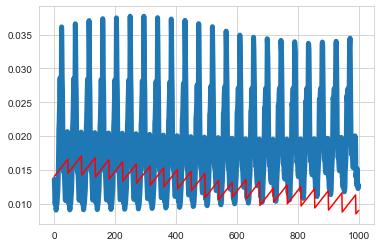

In [12]:
from matplotlib import pyplot as plt
(ystart,yend)  = (0,1000)
plt.plot([i for i in range(len(lr_y[ystart:yend]))],lr_y[ystart:yend],label = "Actual y",linewidth = 5)
plt.plot([i for i in range(len(lr_y[ystart:yend]))],lr_y_pred[ystart:yend],label = "Predicted y",alpha =1,color = "red")
plt.show()

### Test on test grid(can be a cell)

In [13]:
testset3030  = spec1_trainset.loc[(spec1_trainset["x"] > 150) & (spec1_trainset["y"] >250)]
testset3030

,x,y,hour,emission_value,nbr,nbl,nbu,nbd,building_height,wind,nbr_out,nbl_out,nbu_out,nbd_out,emission_value_out
369648,151,251,0,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.0,0.000000,0.000000,0.0,0.000000
369649,151,251,1,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.0,0.000000,0.000000,0.0,0.000000
369650,151,251,2,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.0,0.000000,0.000000,0.0,0.000000
369651,151,251,3,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.0,0.000000,0.000000,0.0,0.000000
369652,151,251,4,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.0,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079995,249,349,43,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.0,0.011800,0.011717,0.0,0.011732
1079996,249,349,44,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.0,0.014070,0.013944,0.0,0.013980
1079997,249,349,45,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.0,0.017873,0.017751,0.0,0.017794
1079998,249,349,46,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.0,0.018957,0.018886,0.0,0.018918


In [30]:
window_size = 4
ml_testset3030 = reshape_whole_table(testset3030,window_size =window_size,drop_columns=["x","y","building_height"],target_value="emission_value_out")
ml_testset3030 = ml_testset3030.drop(columns=["nbr_out(3)","nbl_out(3)","nbu_out(3)","nbd_out(3)"],axis=1)
ml_testset3030


KeyboardInterrupt: 

In [31]:
ml_testset3030.describe()

,x,y,building_height,hour(0),emission_value(0),nbr(0),nbl(0),nbu(0),nbd(0),wind(0),...,nbu_out(2),nbd_out(2),hour(3),emission_value(3),nbr(3),nbl(3),nbu(3),nbd(3),wind(3),emission_value_out
count,441045.000000,441045.000000,441045.000000,441045.000000,441045.000000,441045.000000,441045.000000,441045.000000,441045.000000,4.410450e+05,...,441045.000000,441045.000000,441045.000000,441045.000000,441045.000000,441045.000000,441045.000000,441045.000000,4.410450e+05,441045.000000
mean,200.000000,300.000000,11.957239,22.000000,0.000440,0.000438,0.000439,0.000438,0.000438,2.457334e+00,...,0.007824,0.007884,25.000000,0.000441,0.000439,0.000440,0.000439,0.000439,2.457334e+00,0.008019
std,28.577413,28.577413,11.027727,12.987188,0.002341,0.002338,0.002335,0.002318,0.002340,4.440897e-16,...,0.010100,0.010111,12.987188,0.002342,0.002339,0.002336,0.002319,0.002341,4.440897e-16,0.010169
min,151.000000,251.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.457334e+00,...,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.457334e+00,0.000000
25%,175.000000,275.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.457334e+00,...,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.457334e+00,0.000000
50%,200.000000,300.000000,14.190002,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.457334e+00,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.457334e+00,0.000000
75%,225.000000,325.000000,22.064087,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.457334e+00,...,0.014261,0.014295,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.457334e+00,0.014621
max,249.000000,349.000000,75.989258,44.000000,0.050190,0.050190,0.050190,0.045558,0.050190,2.457334e+00,...,0.054821,0.054821,47.000000,0.050190,0.050190,0.050190,0.045558,0.050190,2.457334e+00,0.054821


RMSE = 0.0103255123
MAE = 0.0256111057
MAPE = 41883793526485.16%


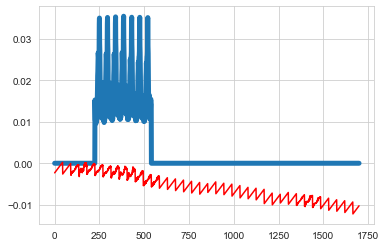

In [17]:
test_lr_y = ml_testset3030["emission_value_out"].values
test_lr_y_pred = lr_model.predict(ml_testset3030.loc[:,~ml_testset3030.columns.str.contains('out', case=False)])


test_lr_residuals = test_lr_y_pred - test_lr_y
test_lr_rmse = np.sqrt(np.sum(np.power(lr_residuals,2)) / len(lr_residuals))
print('RMSE = %.10f' % lr_rmse)
print('MAE = %.10f' % mean_absolute_error(test_lr_y,test_lr_y_pred))
print('MAPE = %.2f' % mean_absolute_percentage_error(test_lr_y,test_lr_y_pred) +"%")

(ystart,yend)  = (0,1700)
plt.plot([i for i in range(len(test_lr_y[ystart:yend]))],test_lr_y[ystart:yend],label = "Actual y",linewidth = 5)
plt.plot([i for i in range(len(test_lr_y_pred[ystart:yend]))],test_lr_y_pred[ystart:yend],label = "Predicted y",alpha =1,color = "red")
plt.show()

### Helper function for visualization 

In [18]:
import seaborn as sns
import matplotlib.pylab as plt
def make_heatmap_from_pd(result_dataframe,hour,hour_name = "hour",target_name = "emission_value"):
    result_1specieshour = result_dataframe.loc[result_dataframe[hour_name] == hour]
    result_1specieshour = result_1specieshour[["x","y",target_name]]

    x = result_1specieshour["x"].max() - result_1specieshour["x"].min() + 1
    y = result_1specieshour["y"].max() - result_1specieshour["y"].min() + 1
    v = result_1specieshour[target_name].to_numpy().reshape((x, y))
    indices = result_1specieshour[["x", 'y']].to_numpy().T
    indices[0] = indices[0] - indices[0].min()
    indices[1] = indices[1] - indices[1].min()

    v = np.tile(np.nan, indices.max(axis=1)+1)
    v[tuple(indices)] = result_1specieshour[target_name]
    ax = sns.heatmap(v)
    plt.show()

### Adding predicted colmn and results visualization

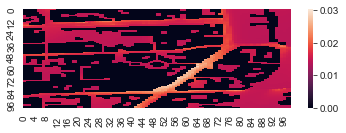

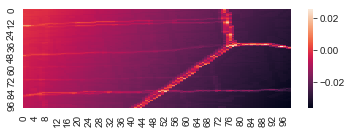

In [19]:
viz_ml = ml_testset3030.copy()
viz_ml["pred_emission_value_out"] = test_lr_y_pred
hour = 33
plt.subplot(2,1,1)
make_heatmap_from_pd(viz_ml,hour,hour_name="hour(3)",target_name="emission_value_out")
plt.subplot(2,1,2)
make_heatmap_from_pd(viz_ml,hour,hour_name="hour(3)",target_name="pred_emission_value_out")

## Random Forest regressor

### Train on subset

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
lr_model = RandomForestRegressor(max_depth=8)
lr_model.fit(trainset.loc[:,~trainset.columns.str.contains('emission_value_out', case=False)], trainset["emission_value_out"])

t0 = time.time()
lr_y = testset['emission_value_out'].values
lr_y_fit = lr_model.predict(trainset.loc[:,~trainset.columns.str.contains('emission_value_out', case=False)])
lr_y_pred = lr_model.predict(testset.loc[:,~testset.columns.str.contains('emission_value_out', case=False)])
tF = time.time()

lr_residuals = lr_y_pred - lr_y
lr_rmse = np.sqrt(np.sum(np.power(lr_residuals,2)) / len(lr_residuals))
print('RMSE = %.10f' % lr_rmse)
print('MAE = %.10f' % mean_absolute_error(lr_y,lr_y_pred))
print('Time to train = %.2f seconds' % (tF - t0))

RMSE = 0.0030076066
MAE = 0.0011553758
Time to train = 0.54 seconds


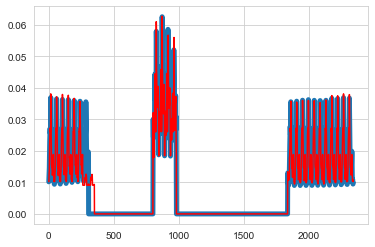

In [22]:
from matplotlib import pyplot as plt
(ystart,yend)  = (int(len(lr_y)*0.2),int(len(lr_y)*0.22))
plt.plot([i for i in range(len(lr_y[ystart:yend]))],lr_y[ystart:yend],label = "Actual y",linewidth = 5)
plt.plot([i for i in range(len(lr_y[ystart:yend]))],lr_y_pred[ystart:yend],label = "Predicted y",alpha =1,color = "red")
plt.show()

### Test on another subset

RMSE = 0.0030076066
MAE = 0.0025706313
MAPE = 6065841835507.24%


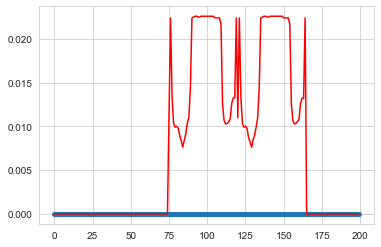

In [24]:
test_lr_y = ml_testset3030["emission_value_out"].values
test_lr_y_pred = lr_model.predict(ml_testset3030.loc[:,~ml_testset3030.columns.str.contains('emission_value_out', case=False)])


test_lr_residuals = test_lr_y_pred - test_lr_y
test_lr_rmse = np.sqrt(np.sum(np.power(lr_residuals,2)) / len(lr_residuals))
print('RMSE = %.10f' % lr_rmse)
print('MAE = %.10f' % mean_absolute_error(test_lr_y,test_lr_y_pred))
print('MAPE = %.2f' % mean_absolute_percentage_error(test_lr_y,test_lr_y_pred) +"%")

(ystart,yend)  = (1500,1700)
plt.plot([i for i in range(len(test_lr_y[ystart:yend]))],test_lr_y[ystart:yend],label = "Actual y",linewidth = 5)
plt.plot([i for i in range(len(test_lr_y_pred[ystart:yend]))],test_lr_y_pred[ystart:yend],label = "Predicted y",alpha =1,color = "red")
plt.show()

### Visualization

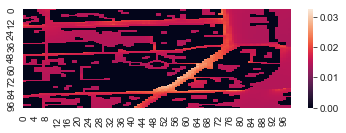

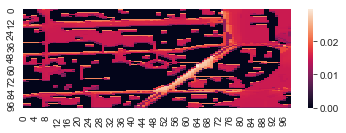

In [25]:
viz_ml = ml_testset3030.copy()
viz_ml["pred_emission_value_out"] = test_lr_y_pred
hour = 35
plt.subplot(2,1,1)
make_heatmap_from_pd(viz_ml,hour,hour_name="hour(3)",target_name="emission_value_out")
plt.subplot(2,1,2)
make_heatmap_from_pd(viz_ml,hour,hour_name="hour(3)",target_name="pred_emission_value_out")

## XGBoost

### Train on subset

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
lr_model = GradientBoostingRegressor()
lr_model.fit(trainset.loc[:,~trainset.columns.str.contains('_out', case=False)], trainset["emission_value_out"])

t0 = time.time()
lr_y = testset['emission_value_out'].values
lr_y_fit = lr_model.predict(trainset.loc[:,~trainset.columns.str.contains('_out', case=False)])
lr_y_pred = lr_model.predict(testset.loc[:,~testset.columns.str.contains('_out', case=False)])
tF = time.time()

lr_residuals = lr_y_pred - lr_y
lr_rmse = np.sqrt(np.sum(np.power(lr_residuals,2)) / len(lr_residuals))
print('RMSE = %.10f' % lr_rmse)
print('MAE = %.10f' % mean_absolute_error(lr_y,lr_y_pred))
print('Time to train = %.2f seconds' % (tF - t0))

RMSE = 0.0068924915
MAE = 0.0049893203
Time to train = 0.19 seconds


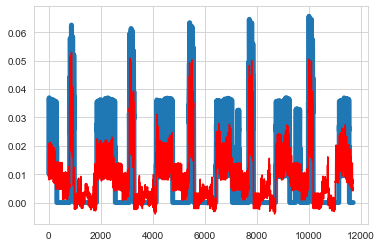

In [27]:
from matplotlib import pyplot as plt
(ystart,yend)  = (int(len(lr_y)*0.2),int(len(lr_y)*0.3))
plt.plot([i for i in range(len(lr_y[ystart:yend]))],lr_y[ystart:yend],label = "Actual y",linewidth = 5)
plt.plot([i for i in range(len(lr_y[ystart:yend]))],lr_y_pred[ystart:yend],label = "Predicted y",alpha =1,color = "red")
plt.show()

### Test on another subset

RMSE = 0.0068924915
MAE = 0.0081701062
MAPE = 4019656284094.79%


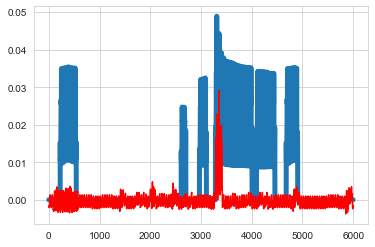

In [29]:
test_lr_y = ml_testset3030["emission_value_out"].values
test_lr_y_pred = lr_model.predict(ml_testset3030.loc[:,~ml_testset3030.columns.str.contains('_out', case=False)])


test_lr_residuals = test_lr_y_pred - test_lr_y
test_lr_rmse = np.sqrt(np.sum(np.power(lr_residuals,2)) / len(lr_residuals))
print('RMSE = %.10f' % lr_rmse)
print('MAE = %.10f' % mean_absolute_error(test_lr_y,test_lr_y_pred))
print('MAPE = %.2f' % mean_absolute_percentage_error(test_lr_y,test_lr_y_pred) +"%")

(ystart,yend)  = (0,6000)
plt.plot([i for i in range(len(test_lr_y[ystart:yend]))],test_lr_y[ystart:yend],label = "Actual y",linewidth = 5)
plt.plot([i for i in range(len(test_lr_y_pred[ystart:yend]))],test_lr_y_pred[ystart:yend],label = "Predicted y",alpha =1,color = "red")
plt.show()

### Visualization

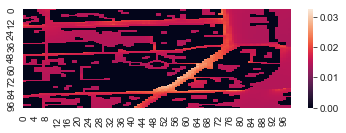

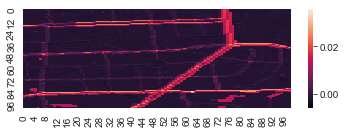

In [32]:
viz_ml = ml_testset3030.copy()
viz_ml["pred_emission_value_out"] = test_lr_y_pred
hour = 35
plt.subplot(2,1,1)
make_heatmap_from_pd(viz_ml,hour,hour_name="hour(3)",target_name="emission_value_out")
plt.subplot(2,1,2)
make_heatmap_from_pd(viz_ml,hour,hour_name="hour(3)",target_name="pred_emission_value_out")

## Neural Network

In [33]:
# Here goes work with neural networks, but atm we jump to cutting nighttime information out, due to irrelevance

# Dataset without nighttime palm inputs and outputs

### Preparing datasets

In [45]:
day_spec1 = spec1_trainset.loc[(spec1_trainset["hour"]>=27) & (spec1_trainset["hour"]<=44)]
day_spec1

,x,y,hour,emission_value,nbr,nbl,nbu,nbd,building_height,wind,nbr_out,nbl_out,nbu_out,nbd_out,emission_value_out
27,100,200,27,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.038015,0.000000,0.000000,0.037861,0.037880
28,100,200,28,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.035078,0.000000,0.000000,0.035003,0.034906
29,100,200,29,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.029295,0.000000,0.000000,0.029518,0.029462
30,100,200,30,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.027518,0.000000,0.000000,0.027671,0.027728
31,100,200,31,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.022723,0.000000,0.000000,0.022824,0.022817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079992,249,349,40,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.000000,0.008415,0.008396,0.000000,0.008390
1079993,249,349,41,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.000000,0.009018,0.008957,0.000000,0.008970
1079994,249,349,42,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.000000,0.009607,0.009568,0.000000,0.009581
1079995,249,349,43,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.000000,0.011800,0.011717,0.000000,0.011732


In [ ]:
test = fill_with_art_hours(day_spec1,spec1_trainset,fill_value=0.012,number_of_hours=3).sort_values(by = ['x', 'y','hour'], ascending = [True, True,True])

In [59]:
test

,x,y,hour,emission_value,nbr,nbl,nbu,nbd,building_height,wind,nbr_out,nbl_out,nbu_out,nbd_out,emission_value_out
24,100,200,24,0.0,0.0,0.0,0.0,0.0,0.000000,2.457334,0.000000,0.0,0.0,0.000000,0.000000
25,100,200,25,0.0,0.0,0.0,0.0,0.0,0.000000,2.457334,0.000000,0.0,0.0,0.000000,0.000000
26,100,200,26,0.0,0.0,0.0,0.0,0.0,0.000000,2.457334,0.000000,0.0,0.0,0.000000,0.000000
27,100,200,27,0.0,0.0,0.0,0.0,0.0,0.000000,2.457334,0.038015,0.0,0.0,0.037861,0.037880
28,100,200,28,0.0,0.0,0.0,0.0,0.0,0.000000,2.457334,0.035078,0.0,0.0,0.035003,0.034906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73000,110,220,40,0.0,0.0,0.0,0.0,0.0,6.497124,2.457334,0.000000,0.0,0.0,0.000000,0.000000
73001,110,220,41,0.0,0.0,0.0,0.0,0.0,6.497124,2.457334,0.000000,0.0,0.0,0.000000,0.000000
73002,110,220,42,0.0,0.0,0.0,0.0,0.0,6.497124,2.457334,0.000000,0.0,0.0,0.000000,0.000000
73003,110,220,43,0.0,0.0,0.0,0.0,0.0,6.497124,2.457334,0.000000,0.0,0.0,0.000000,0.000000


In [63]:
#parameters
window_size = 4
drop_template = "out"
#trainset
day_trainset = day_spec1.copy()
day_trainset = day_trainset.loc[(day_trainset["x"]<= 150) & (day_trainset["y"]<=250)]
day_trainset_windowed = reshape_to_window(day_trainset,window_size=window_size,drop_columns=["x","y","building_height","wind"],include_target=False,target_value="emission_value_out")
day_trainset_windowed = day_trainset_windowed.drop(columns=["nbr_out(3)","nbl_out(3)","nbu_out(3)","nbd_out(3)"],axis=1)
day_trainset_target = day_trainset_windowed["emission_value_out"]
day_trainset_windowed = day_trainset_windowed.loc[:,~day_trainset_windowed.columns.str.contains(drop_template, case=False)]
#testset
day_testset = day_spec1.copy()
day_testset = day_spec1.loc[(day_spec1["x"]> 150) & (day_spec1["y"]>250)]
day_testset_windowed = reshape_to_window(day_testset,window_size=window_size,drop_columns=["x","y","building_height","wind"],include_target=False,target_value="emission_value_out")
day_testset_windowed = day_testset_windowed.drop(columns=["nbr_out(3)","nbl_out(3)","nbu_out(3)","nbd_out(3)"],axis=1)
day_testset_target = day_testset_windowed["emission_value_out"]
day_testset_windowed = day_testset_windowed.loc[:,~day_testset_windowed.columns.str.contains(drop_template, case=False)]
day_testset_windowed


,x,y,building_height,wind,hour(0),emission_value(0),nbr(0),nbl(0),nbu(0),nbd(0),...,nbr(2),nbl(2),nbu(2),nbd(2),hour(3),emission_value(3),nbr(3),nbl(3),nbu(3),nbd(3)
0,151,251,0.0,2.457334,27,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,30,0.0,0.0,0.0,0.0,0.0
1,151,251,0.0,2.457334,28,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,31,0.0,0.0,0.0,0.0,0.0
2,151,251,0.0,2.457334,29,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,32,0.0,0.0,0.0,0.0,0.0
3,151,251,0.0,2.457334,30,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,33,0.0,0.0,0.0,0.0,0.0
4,151,251,0.0,2.457334,31,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,34,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176410,249,349,0.0,2.457334,37,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,40,0.0,0.0,0.0,0.0,0.0
176411,249,349,0.0,2.457334,38,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,41,0.0,0.0,0.0,0.0,0.0
176412,249,349,0.0,2.457334,39,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,42,0.0,0.0,0.0,0.0,0.0
176413,249,349,0.0,2.457334,40,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,43,0.0,0.0,0.0,0.0,0.0


In [69]:
#Dataset for rowwise proof
day_spec1_row =  day_spec1.loc[((day_spec1["x"]> 150) & (day_spec1["x"]< 175)) & ((day_spec1["y"]>250) & (day_spec1["y"]<275))]
day_spec1_row = day_spec1_row.loc[(day_spec1_row["hour"])<]

,x,y,hour,emission_value,nbr,nbl,nbu,nbd,building_height,wind,nbr_out,nbl_out,nbu_out,nbd_out,emission_value_out
369675,151,251,27,0.0,0.0,0.0,0.0,0.0,0.000000,2.457334,0.000000,0.000000,0.000000,0.000000,0.000000
369676,151,251,28,0.0,0.0,0.0,0.0,0.0,0.000000,2.457334,0.000000,0.000000,0.000000,0.000000,0.000000
369677,151,251,29,0.0,0.0,0.0,0.0,0.0,0.000000,2.457334,0.000000,0.000000,0.000000,0.000000,0.000000
369678,151,251,30,0.0,0.0,0.0,0.0,0.0,0.000000,2.457334,0.000000,0.000000,0.000000,0.000000,0.000000
369679,151,251,31,0.0,0.0,0.0,0.0,0.0,0.000000,2.457334,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536392,174,274,40,0.0,0.0,0.0,0.0,0.0,17.308933,2.457334,0.009979,0.010115,0.010088,0.010007,0.010045
536393,174,274,41,0.0,0.0,0.0,0.0,0.0,17.308933,2.457334,0.010519,0.010618,0.010630,0.010500,0.010573
536394,174,274,42,0.0,0.0,0.0,0.0,0.0,17.308933,2.457334,0.011023,0.011110,0.011096,0.011052,0.011069
536395,174,274,43,0.0,0.0,0.0,0.0,0.0,17.308933,2.457334,0.013903,0.013985,0.013995,0.013911,0.013952


## Linear Regression

### Train on subset

In [64]:
day_lr_model = LinearRegression()
day_lr_model.fit(day_trainset_windowed,day_trainset_target)

LinearRegression()

### Test on subset

RMSE = 0.0302649851
MAE = 0.0268819000


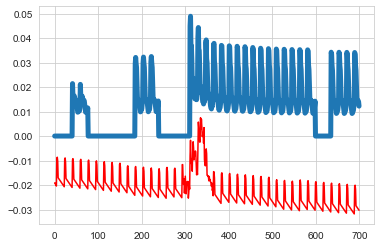

In [65]:
pred_day_testset_target = day_lr_model.predict(day_testset_windowed)

lr_y = day_testset_target
lr_y_pred = pred_day_testset_target
lr_residuals = day_testset_target - pred_day_testset_target
lr_rmse = np.sqrt(np.sum(np.power(lr_residuals, 2)) / len(lr_residuals))
print('RMSE = %.10f' % lr_rmse)
print('MAE = %.10f' % mean_absolute_error(lr_y, lr_y_pred))

(ystart, yend) = (1000, 1700)
plt.plot([i for i in range(len(lr_y[ystart:yend]))], lr_y[ystart:yend], label="Actual y", linewidth=5)
plt.plot([i for i in range(len(lr_y[ystart:yend]))], lr_y_pred[ystart:yend], label="Predicted y", alpha=1, color="red")
plt.show()


### Visualiztion

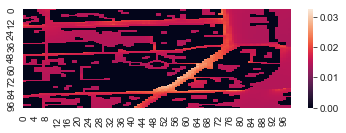

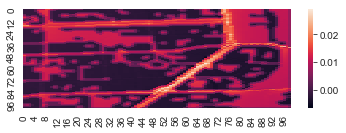

In [62]:
viz_ml = day_testset_windowed.copy()
viz_ml["pred_emission_value_out"] = lr_y_pred
viz_ml["emission_value_out"] = lr_y
hour = 35
plt.subplot(2,1,1)
make_heatmap_from_pd(viz_ml,hour,hour_name="hour(3)",target_name="emission_value_out")
plt.subplot(2,1,2)
make_heatmap_from_pd(viz_ml,hour,hour_name="hour(3)",target_name="pred_emission_value_out")